# 1. Analysis based on the national intimate partner and sexual violence survey (NISVS)

1. track data sources: 

https://worldpopulationreview.com/state-rankings/domestic-violence-by-state

-> [National Coalition Against Domestic Violence](https://ncadv.org/state-by-state )

-> Smith, S.G., Chen, J., Basile, K.C., Gilbert, L.K., Merrick, M.T., Patel, N., Walling, M., & Jain, A. (2017). 
The national intimate partner and sexual violence survey (NISVS): 2010-2012 state report. Atlanta: National Center for Injury Prevention and Control, Centers for Disease Control and Prevention. 
Retrieved from https://www.cdc.gov/violenceprevention/pdf/NISVS-StateReportBook.pdf 

Table 5.7 - Lifetime prevalence of contact sexual violence, physical violence, and/or stalking
victimization by an intimate partner, by state of residence — U.S. Women . . . . . . . . . . . . . . . . . . . . 128 

Table 5.9 - Lifetime prevalence of psychological aggression by an intimate partner, by state of residence — U.S. women. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 134


Table 5 .13 - Lifetime prevalence of contact sexual violence, physical violence, and/or stalking victimizationbyanintimatepartner,bystateofresidence—U.S.Men .......................144

Table 5.15 - Lifetime prevalence of psychological aggression by an intimate partner, by state of residence — U.S. Men . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 149 

Survey method: 

The National Intimate Partner and Sexual Violence Survey is an ongoing,
nationally representative survey of sexual violence, stalking, and intimate
partner violence among adult women and men in the United States. NISVS is
a random-digit-dial (RDD) telephone survey of U.S. non-institutionalized
English- and/or Spanish-speaking persons aged 18 years and older.
NISVS uses a dual-frame sampling strategy that includes both landline
and cell phones. The survey is conducted in all 50 states and the
District of Columbia. 


2. Illustration:

XX% of XX state women and XX% of XX state men experience intimate partner physical violence, intimate partner sexual violence and/or intimate partner stalking in their lifetimes.




What I want to show in the plot?

1. VT: rank; Male vs female

2. national level; state with the highest/lowest rate; state with the moset/least estimated number of victims; VT


##**(1) State by state**

Information we want to plot: 

national level; state with the highest/lowest rate; state with the moset/least estimated number of victims; VT rank

1. DATA

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
fp = '/content/drive/MyDrive/2022 spring 5293 comp journalism/VTDigger Story/VTDigger-DV-story-data&codes/data'

In [ ]:
#@title
# load the libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

# Load and prepare the data: Table 5.7 - Lifetime prevalence of contact sexual violence, physical violence, and/or stalking victimization by an intimate partner, by state of residence — U.S. Women
# this data contains US and D.C.
data = pd.read_csv(f'{fp}/table5.7(Any Contact Sexual Violence,1 Physical Violence, and:or Stalking by an Intimate Partner).csv')
data['Estimated Number of Victims']=data['Estimated Number of Victims'].replace({',':''},regex=True).apply(pd.to_numeric,1)
# data.loc[data['State'] == 'United States']
# data.loc[data['State'] == 'District of Columbia']
US0 = data.loc[data['State'] == 'United States'] # extract the US row
data = data.drop(labels=[0,9],axis=0,inplace=False) # drop the US and D.C. rows
data.head()

,State,Weighted %,Estimated Number of Victims
1,Alabama,37.5,713000
2,Alaska,43.3,109000
3,Arizona,42.6,1040000
4,Arkansas,40.8,464000
5,California,34.9,4939000


2. Visualization

In [ ]:
#@title
##Circular barplot

# reference: [Circular barplot with Matplotlib ](https://python-graph-gallery.com/web-circular-barplot-with-matplotlib)
# https://stackoverflow.com/questions/15140072/how-to-map-number-to-color-using-matplotlibs-colormap

# Basic radar plot
# Bars are sorted by the cumulative track length
df_sorted = data.sort_values("Weighted %", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Weighted
WEIGHTED = df_sorted["Weighted %"].values

# US level weights,repeat 50 times
import numpy as np
x = np.array(US0["Weighted %"])
US = np.repeat(x, [50], axis=0)

# Region label
REGION = df_sorted["State"].values

# Estimated Number of Victims per state
VICTIMS_N = df_sorted["Estimated Number of Victims"].values


In [ ]:
#@title
GREY12 = "#1f1f1f"
lightgrey = "#D3D3D3"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

import matplotlib.cm as cm
import matplotlib as matplotlib

def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))#[:3]  # will return rgba, we take only first 3 so we get rgb
    # color = matplotlib.colors.rgb2hex(rgb)
    return rgb
    # return color

COLORS = color_map_color(VICTIMS_N,cmap_name='summer', vmin=50000, vmax=5000000)

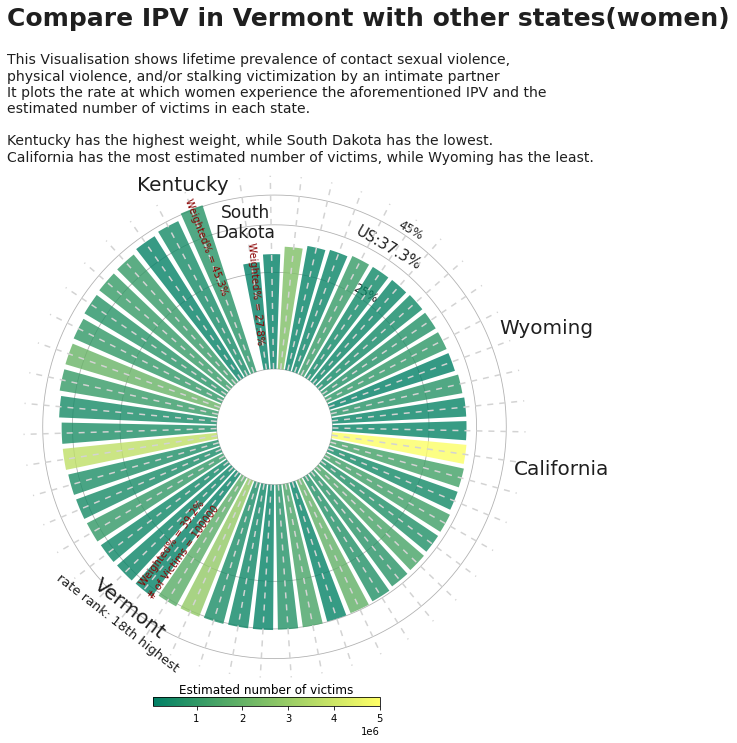

In [ ]:
#@title
# Set default font to Bell MT
# plt.rcParams.update({"font.family": "Bell MT"})
plt.rcParams.update({"font.family": "DejaVu Sans"})


# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-15, 50)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the weights of women experience Any Contact Sexual Violence,1 
# Physical Violence, and:or Stalking by an Intimate Partner in lifetime
ax.bar(ANGLES, WEIGHTED, color=COLORS, alpha=0.8, width=0.1, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 60, color=lightgrey, ls=(0, (4, 4)), zorder=11)

# # Add dots to represent the weights on the US level
# ax.scatter(ANGLES, US , s=20, color=GREY12, zorder=11)


# Add labels for the states -------------------------------------
# # Note the 'wrap()' function.
# # The '5' means we want at most 5 consecutive letters in a word, 
# # but the 'break_long_words' means we don't want to break words 
# # longer than 5 characters.
# REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
# REGION
REGION = ""

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=8);

# Customize guides and annotations
# Remove unnecesary guides ---------------------------------------

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Put grid lines for radial axis (y) at 0, 25, 35, 45
ax.set_yticklabels([])
ax.set_yticks([0, 25, 37.3, 45])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(15)


# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 0
ax.text(3.4 * np.pi / 2, 25 + PAD, "25%", ha="center", size=12,rotation=-30)
ax.text(3.4 * np.pi / 2, 37.3-2, "US:37.3%", ha="center", size=15,rotation=-30)
ax.text(3.4 * np.pi / 2, 45 + PAD, "45%", ha="center", size=12,rotation=-30)

# Add text to explain the meaning of the height of the bar and the
# height of the dot
ax.text(ANGLES[0], 52, "Kentucky", rotation=0, 
        ha="center", va="center", size=20, zorder=12)
ax.text(ANGLES[0], 35, "Weighted% = 45.3%", rotation=-69, 
        ha="center", va="center", size=10, zorder=12,color='darkred')

ax.text(ANGLES[49], 38.5, "South\nDakota", rotation=0, 
        ha="center", va="center", size=17, zorder=12)
ax.text(ANGLES[49], 20, "Weighted% = 27.8%", rotation=-85, 
        ha="center", va="center", size=10, zorder=12,color='darkred')

ax.text(ANGLES[17], 45, "Vermont", rotation=-38, 
        ha="center", va="center", size=20, zorder=12)
ax.text(ANGLES[17], 50, "rate rank: 18th highest", rotation=-38, 
        ha="center", va="center", size=13, zorder=12)
ax.text(ANGLES[17]- 0.05, 25, "Weighted% = 39.2%", rotation= 54,#-52, 
        ha="center", va="center", size=10, zorder=12,color='darkred')
ax.text(ANGLES[17]+ 0.05, 25, "# of Victims = 100000", rotation= 54,#-52, 
        ha="center", va="center", size=10, zorder=12,color='darkred')

ax.text(ANGLES[34], 60, "California", rotation=0, 
        ha="center", va="center", size=20, zorder=12)

ax.text(ANGLES[38], 60, "Wyoming", rotation=0, 
        ha="center", va="center", size=20, zorder=12)


# final chart
# Add legend -----------------------------------------------------

# First, make some room for the legend and the caption in the bottom.
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
# Width and height are given by the (0.35 and 0.01) in the 
# bbox_to_anchor
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.18, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.cm.summer
norm = mpl.colors.Normalize(vmin=50000, vmax=5000000)


# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal"
)

# # Remove the outline of the colorbar
# cb.outline.set_visible(False)

# # Remove tick marks
# cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("Estimated number of victims", size=12, labelpad=-40)

# Add annotations ------------------------------------------------

# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.8)

# Define title, subtitle, and caption
title = "Compare IPV in Vermont with other states(women)"
subtitle = "\n".join([
    "This Visualisation shows lifetime prevalence of contact sexual violence, \nphysical violence, and/or stalking victimization by an intimate partner\n"
    "It plots the rate at which women experience the aforementioned IPV and the \nestimated number of victims in each state.\n",
    "Kentucky has the highest weight, while South Dakota has the lowest.",
    "California has the most estimated number of victims, while Wyoming has the least.\n",
])
# caption = ""

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="left", va="baseline")
fig.text(0.1, 0.9, subtitle, fontsize=14, ha="left", va="top")
# fig.text(0.1, 0.9, subtitle2, fontsize=14, ha="center", va="baseline")
# fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

fig.show()

##**(2) Demographic**

[2018 NCVRW Resource Guide: Intimate Partner Violence Fact Sheet](https://ovc.ojp.gov/sites/g/files/xyckuh226/files/ncvrw2018/info_flyers/fact_sheets/2018NCVRW_IPV_508_QC.pdf)

https://bjs.ojp.gov/data-collection/ncvs#nkgvlm 

https://bjs.ojp.gov/content/pub/pdf/cv18.pdf

https://bjs.ojp.gov/content/pub/pdf/ipv9310.pdf  !!!

https://ncvs.bjs.ojp.gov/Home

https://www.ncbi.nlm.nih.gov/books/NBK499891/

Vermont: 

39.2% of Vermont women and 30.9% of men experience intimate partner physical violence, intimate partner
rape and/or intimate partner stalking in their lifetimes.

In [ ]:
#@title
!pip install pywaffle

from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

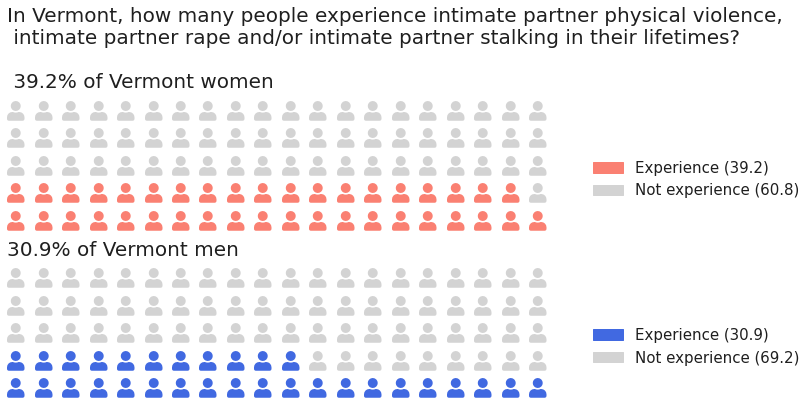

In [ ]:
#@title Demographic - gender
# data
import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['Experience', 'Not experience'],
        'Female': [39.2,60.8],
        'Male': [30.9,69.2],
    },
).set_index('labels')

# plot
colors_list = ['salmon', 'lightgrey']
colors1 = {data.index[i]:colors_list[i] for i in range(len(data))}
colors_list = ['royalblue', 'lightgrey']
colors2 = {data.index[i]:colors_list[i] for i in range(len(data))}

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['Female'],
            'colors':list(colors1.values()),
            'labels': [f"{k} ({v})" for k, v in data['Female'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 0.6),
                'fontsize': 15,
                'frameon': False
            },
            'title': {
                'label': 'In Vermont, how many people experience intimate partner physical violence, \n intimate partner rape and/or intimate partner stalking in their lifetimes? \n\n 39.2% of Vermont women',
                'loc': 'left',
                'fontsize': 20
            }
        },
        312: {
            'values': data['Male'],
            'colors':list(colors2.values()),
            'labels': [f"{k} ({v})" for k, v in data['Male'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 0.6),
                'fontsize': 15,
                'frameon': False
            },
            'title': {
                'label': '30.9% of Vermont men',
                'loc': 'left',
                'fontsize': 20
            }
        }
    },
    rows=5,
    icons=['user','user'],
    icon_size=20,
    vertical = True,
    figsize=(23, 8)  # figsize is a parameter of plt.figure
)


# 2.Analysis based on NIBRS data

1. Where do we download the data?

[Federal Bureau of Investigation Crime Data Explorer](https://crime-data-explorer.fr.cloud.gov/pages/home)

2. What is NIBRS data?

Created to improve the quantity and quality of crime data collected by law enforcement, the FBI UCR Program’s National Incident-Based Reporting System (NIBRS) captures more detailed information for each single crime occurrence than the traditional Summary Reporting System (SRS).  When used to its full potential at the agency level, the NIBRS identifies with precision when and where crime takes place, what form it takes, and the characteristics of its victims and perpetrators.  As more law enforcement agencies (LEAs) submit their crime data via the NIBRS, they—along with legislators, municipal planners and administrators, academicians, researchers, and the general public—will be better able to assess the scope of the nation’s crime problem.

NIBRS 2012 shows the rich details captured through incident-based reporting.  This second compilation of annual NIBRS data represents crime reported for calendar year 2012 by 6,115 LEAs around the nation, approximately 33 percent of all agencies that submit data to the FBI UCR Program.  The data include information on incidents, offenses, victims, and known offenders for 46 specific crimes in 22 major offense categories.  The report details the age, sex, and race of victims, offenders, and arrestees; crime locations and times of day; and the type of weapons and force involved.  Comprised of 97 tables, NIBRS 2012 features 32 offense tables about crimes against persons, crimes against property, and crimes against society; 24 tables on sex offenses; 36 tables that list offenses by state by individual law enforcement agency; and 5 tables focusing on the demographics of the arrestees connected to NIBRS incidents.

3. Our definition of domestic violence while dealing with this tricky data?/How to deal with the data? 

Refer the method used in the following reports.

[Crime research group](https://www.crgvt.org/)

[Vermont Crime Analysis Using National Incident Based Reporting System (NIBRS) Data on Domestic Violence, 2015-2019](https://www.crgvt.org/uploads/5/2/2/2/52222091/bjs2018_vt_crime_analysis_-_domestic_violence_report__2_.pdf)


Domestic violence (DV) refers to a particular subset of offenses committed by household members, spouses
(including ex- and common law spouses), children/stepchildren, or family members. While some domestic
incidents involve non-violent offenses (e.g., identity theft, forgery, motor vehicle theft), this report focuses
on violent offenses (e.g., murder, rape, assault) that occur during domestic incidents. 

Rather than report
crimes as DV, NIBRS requires law enforcement to record the relationship of the victim to the offender.
Incidents included in this report can be categorized as intimate partner violence (IPV) (i.e., violent offenses
committed against a boyfriend/girlfriend, homosexual partner, spouse, ex-spouse, or common law spouse)
and DV against children aged 18 and younger (i.e., violent offenses against a biological child, child of a
boyfriend/girlfriend, or a stepchild).

[Rural and Urban Domestic Violence in Vermont 2015-2019](https://www.crgvt.org/uploads/5/2/2/2/52222091/bjs_2018_rural_and_urban_domestic_violence_in_vermont.pdf)

Initially, all victims were identified where the
offender was a current or former intimate partner.6 Excluded were crimes having no element of
violence, such as the larceny offenses. Retained were all violent crimes against persons including
homicide, simple assault, aggravated assault, sexual assault, robbery, and human trafficking.
Destruction of property was included because violence is involved in destroying property and there
were some offenses coded with injuries in the data. The seriousness of the injury was coded as to
whether the injury was serious, no injury, or minor injury. An injury was determined to be serious if
the following NIBRS values were entered: severe laceration, loss of teeth, unconsciousness,
suspected internal injury, apparent broken bones, other major injury, or if the offense code was for
murder or negligent homicide. 


4. How to create a dataframe we need?

NIBRS_incident

JOIN NIBRS_OFFENDER by INCIDENT_ID

JOIN NIBRS_VICTIM by INCIDENT_ID (the match may be not unique as one incident may have multiple victims and multiple offenders)

JOIN NIBRS_VICTIM_OFFENDER_REL   #also use NIBRS_RELATIONSHIP.csv

JOIN NIBRS_OFFENSE by INCIDENT_ID
JOIN NIBRS_OFFENSE_TYPE by OFFENSE_TYPE_ID
then filter some offense type. exclude crimes having no element of violence, such as the larceny offenses

JOIN agencies.csv by AGENCY_ID 
so we get the agency thus the county

......


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Define a data processing function



In [ ]:
#@title
# define a function to convert names of filefolders to a uniform format
import os, sys

def convert(rootdir, optype='l'):
  '''
  l: to lowercase
  u: to uppercase
  '''
  dirlist = os.listdir(rootdir)
  for index, onedir in enumerate(dirlist):
    cdir = ''
    if optype == 'l':
      cdir = onedir.lower()
    elif optype == 'u':
      cdir = onedir.upper()
    subdir = os.path.join(rootdir, onedir)

    if onedir != cdir:      
      subcdir = os.path.join(rootdir, cdir)
      os.rename(subdir, subcdir)          
      dirlist[index] = cdir
      subdir = subcdir

    if os.path.isdir(subdir):
      convert(subdir, optype)

# reference：https://juejin.cn/post/6904220139886608391

In [ ]:
#@title
# define a function to pre-process the data
import pandas as pd
from pandas import read_csv

pd.set_option('display.max_columns', None)


def data_processing(fp_year):  # input the year you are interested in

  fp_vt = "/content/drive/MyDrive/2022 spring 5293 comp journalism/VTDigger Story/VTDigger-DV-story-data&codes/data" # change your path 
  # fp_year = 2019 
  fp_vt_year = fp_vt + f"/VT {fp_year}/" #the complete path

  #deal with the filename
  convert(fp_vt_year, optype='u')

  incident = read_csv(fp_vt_year+'NIBRS_INCIDENT.CSV')

  offense = read_csv(fp_vt_year+'NIBRS_OFFENSE.CSV')

  # merge incident and offense
  merged = incident.merge(offense,on=['DATA_YEAR','INCIDENT_ID'])
  offense_type = read_csv((fp_vt_year+'NIBRS_OFFENSE_TYPE.CSV'))

  merged = merged.merge(offense_type,on=['OFFENSE_TYPE_ID'])
  # filter crime against type 'Person'; or 'Property' when it is 'Destruction/Damage/Vandalism of Property'
  offense_type_against_person = offense_type[(offense_type['CRIME_AGAINST']=='Person')|(offense_type['OFFENSE_CATEGORY_NAME']=='Destruction/Damage/Vandalism of Property')] # exclude 6 Family Offenses, Nonviolent or not?
  # offense_type_against_person = offense_type[(offense_type['CRIME_AGAINST']=='Person')] # exclude 6 Family Offenses, Nonviolent or not?
  offense_type_against_person_id = offense_type_against_person['OFFENSE_TYPE_ID']
  offense_against_person = merged[[i in list(offense_type_against_person_id) for i in merged['OFFENSE_TYPE_ID']]]	


  # merge information about offenders and victims
  offender = read_csv(fp_vt_year+'NIBRS_OFFENDER.CSV')
  offender.columns = list(offender.columns[:4])+['OFFENDER_'+ sub for sub in offender.columns[4:]] #add prefix 'OFFENDER_' to some columns
  victim = read_csv(fp_vt_year+'NIBRS_VICTIM.CSV')
  victim.columns = list(victim.columns[:4])+['VICTIM_'+ sub for sub in victim.columns[4:]]
  # merge
  merged = offense_against_person.merge(offender,on=['DATA_YEAR', 'INCIDENT_ID'])
  merged = merged.merge(victim,on=['DATA_YEAR', 'INCIDENT_ID'])

  # merge victim and offender relationship
  v_o_reln = read_csv(fp_vt_year+'NIBRS_VICTIM_OFFENDER_REL.CSV')
  merged = merged.merge(v_o_reln,on=['DATA_YEAR', 'VICTIM_ID','OFFENDER_ID'],how="inner") # "inner" only retains rows in which RELATIONSHIP_ID is not missing

  # merge agencies
  agencies = read_csv(fp_vt_year+'AGENCIES.CSV')
  agencies_sub = agencies[["AGENCY_ID","UCR_AGENCY_NAME","NCIC_AGENCY_NAME","PUB_AGENCY_NAME","AGENCY_TYPE_NAME","COUNTY_NAME"]]
  merged = merged.merge(agencies_sub,on=['AGENCY_ID'],how = "left")

  # process date
  merged['SUBMISSION_DATE']=pd.to_datetime(merged['SUBMISSION_DATE'])
  merged['INCIDENT_DATE']=pd.to_datetime(merged['INCIDENT_DATE']) # convert to datetime
  merged['incident_year_month'] = merged['INCIDENT_DATE'].dt.to_period('M') # add a new column only has year and month
  merged['incident_month'] = merged['INCIDENT_DATE'].dt.month # add a new column only has month

  merged['DATA_YEAR'] = merged['DATA_YEAR'].astype('category')


  # select useful columns
  df = merged[['DATA_YEAR', 
               'incident_year_month', 
               'incident_month', 
               'INCIDENT_DATE',
              
              'UCR_AGENCY_NAME','NCIC_AGENCY_NAME', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME',
               'COUNTY_NAME',

               'OFFENSE_NAME',
               
              'OFFENDER_ID', 'OFFENDER_SEQ_NUM', 
              'OFFENDER_AGE_ID','OFFENDER_AGE_NUM', 'OFFENDER_SEX_CODE', 'OFFENDER_RACE_ID',
              'OFFENDER_ETHNICITY_ID', 'OFFENDER_AGE_RANGE_LOW_NUM','OFFENDER_AGE_RANGE_HIGH_NUM', 

              'VICTIM_ID', 'VICTIM_SEQ_NUM',
              'VICTIM_VICTIM_TYPE_ID', 'VICTIM_ASSIGNMENT_TYPE_ID',
              'VICTIM_ACTIVITY_TYPE_ID', 'VICTIM_OUTSIDE_AGENCY_ID', 'VICTIM_AGE_ID',
              'VICTIM_AGE_NUM', 'VICTIM_SEX_CODE', 'VICTIM_RACE_ID',
              'VICTIM_ETHNICITY_ID', 'VICTIM_RESIDENT_STATUS_CODE',
              'VICTIM_AGE_RANGE_LOW_NUM', 'VICTIM_AGE_RANGE_HIGH_NUM',

              'RELATIONSHIP_ID']]

  # according to victim and offender relationship, filter DV relationships
  reln = read_csv(fp_vt_year+"NIBRS_RELATIONSHIP.CSV")
  reln_ipv = reln[[i in [3, 6, 12, 21, 26, 27] for i in reln["RELATIONSHIP_ID"]]]
  reln_child = reln[[i in [4, 5, 10, 20] for i in reln["RELATIONSHIP_ID"]]] # should Grandchild	be included or not? Remember to check
  df_ipv = df.merge(reln_ipv,on=['RELATIONSHIP_ID'],how="inner")
  df_child = df.merge(reln_child,on=['RELATIONSHIP_ID'],how="inner")

  return df_ipv,df_child

Calendar years 2017-2020 were used for the analysis. 

In [ ]:
#@title
df_ipv_2017,df_child_2017 = data_processing(fp_year=2017)
df_ipv_2018,df_child_2018 = data_processing(fp_year=2018)
df_ipv_2019,df_child_2019 = data_processing(fp_year=2019)
df_ipv_2020,df_child_2020 = data_processing(fp_year=2020)

In [ ]:
#@title
df_ipv = pd.concat([df_ipv_2017,df_ipv_2018,df_ipv_2019,df_ipv_2020])
df_child = pd.concat([df_child_2017,df_child_2018,df_child_2019,df_child_2020])

In [ ]:
#@title
df_ipv.head()

,DATA_YEAR,incident_year_month,incident_month,INCIDENT_DATE,UCR_AGENCY_NAME,NCIC_AGENCY_NAME,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,COUNTY_NAME,OFFENSE_NAME,OFFENDER_ID,OFFENDER_SEQ_NUM,OFFENDER_AGE_ID,OFFENDER_AGE_NUM,OFFENDER_SEX_CODE,OFFENDER_RACE_ID,OFFENDER_ETHNICITY_ID,OFFENDER_AGE_RANGE_LOW_NUM,OFFENDER_AGE_RANGE_HIGH_NUM,VICTIM_ID,VICTIM_SEQ_NUM,VICTIM_VICTIM_TYPE_ID,VICTIM_ASSIGNMENT_TYPE_ID,VICTIM_ACTIVITY_TYPE_ID,VICTIM_OUTSIDE_AGENCY_ID,VICTIM_AGE_ID,VICTIM_AGE_NUM,VICTIM_SEX_CODE,VICTIM_RACE_ID,VICTIM_ETHNICITY_ID,VICTIM_RESIDENT_STATUS_CODE,VICTIM_AGE_RANGE_LOW_NUM,VICTIM_AGE_RANGE_HIGH_NUM,RELATIONSHIP_ID,RELATIONSHIP_CODE,RELATIONSHIP_NAME,RELATIONSHIP_TYPE_ID
0,2017,2017-01,1,2017-01-28,SP: RUTLAND,STATE POLICE RUTLAND,State Police:,State Police,RUTLAND,Destruction/Damage/Vandalism of Property,112137436,1,5.0,36.0,M,1.0,2.0,36.0,0.0,108836875,1,4,NaN,NaN,NaN,5.0,36.0,F,1.0,2.0,NaN,36.0,0.0,21,SE,Victim Was Spouse,NaN
1,2017,2017-01,1,2017-01-28,SP: RUTLAND,STATE POLICE RUTLAND,State Police:,State Police,RUTLAND,Simple Assault,112137436,1,5.0,36.0,M,1.0,2.0,36.0,0.0,108836875,1,4,NaN,NaN,NaN,5.0,36.0,F,1.0,2.0,NaN,36.0,0.0,21,SE,Victim Was Spouse,NaN
2,2017,2017-11,11,2017-11-24,BURLINGTON,BURLINGTON PD,Burlington,City,CHITTENDEN,Destruction/Damage/Vandalism of Property,112312697,1,5.0,24.0,M,2.0,NaN,24.0,0.0,109008372,1,4,NaN,NaN,NaN,5.0,29.0,F,1.0,2.0,R,29.0,0.0,21,SE,Victim Was Spouse,NaN
3,2017,2017-11,11,2017-11-24,BURLINGTON,BURLINGTON PD,Burlington,City,CHITTENDEN,Simple Assault,112312697,1,5.0,24.0,M,2.0,NaN,24.0,0.0,109008372,1,4,NaN,NaN,NaN,5.0,29.0,F,1.0,2.0,R,29.0,0.0,21,SE,Victim Was Spouse,NaN
4,2017,2017-11,11,2017-11-24,BURLINGTON,BURLINGTON PD,Burlington,City,CHITTENDEN,Aggravated Assault,112312697,1,5.0,24.0,M,2.0,NaN,24.0,0.0,109008372,1,4,NaN,NaN,NaN,5.0,29.0,F,1.0,2.0,R,29.0,0.0,21,SE,Victim Was Spouse,NaN


In [ ]:
#@title
df_child.head()

,DATA_YEAR,incident_year_month,incident_month,INCIDENT_DATE,UCR_AGENCY_NAME,NCIC_AGENCY_NAME,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,COUNTY_NAME,OFFENSE_NAME,OFFENDER_ID,OFFENDER_SEQ_NUM,OFFENDER_AGE_ID,OFFENDER_AGE_NUM,OFFENDER_SEX_CODE,OFFENDER_RACE_ID,OFFENDER_ETHNICITY_ID,OFFENDER_AGE_RANGE_LOW_NUM,OFFENDER_AGE_RANGE_HIGH_NUM,VICTIM_ID,VICTIM_SEQ_NUM,VICTIM_VICTIM_TYPE_ID,VICTIM_ASSIGNMENT_TYPE_ID,VICTIM_ACTIVITY_TYPE_ID,VICTIM_OUTSIDE_AGENCY_ID,VICTIM_AGE_ID,VICTIM_AGE_NUM,VICTIM_SEX_CODE,VICTIM_RACE_ID,VICTIM_ETHNICITY_ID,VICTIM_RESIDENT_STATUS_CODE,VICTIM_AGE_RANGE_LOW_NUM,VICTIM_AGE_RANGE_HIGH_NUM,RELATIONSHIP_ID,RELATIONSHIP_CODE,RELATIONSHIP_NAME,RELATIONSHIP_TYPE_ID
0,2017,2017-11,11,2017-11-24,BURLINGTON,BURLINGTON PD,Burlington,City,CHITTENDEN,Destruction/Damage/Vandalism of Property,112312697,1,5.0,24.0,M,2.0,NaN,24.0,0.0,109008375,2,4,NaN,NaN,NaN,5.0,1.0,M,2.0,NaN,R,1.0,0.0,5,CH,Victim Was Child,NaN
1,2017,2017-11,11,2017-11-24,BURLINGTON,BURLINGTON PD,Burlington,City,CHITTENDEN,Simple Assault,112312697,1,5.0,24.0,M,2.0,NaN,24.0,0.0,109008375,2,4,NaN,NaN,NaN,5.0,1.0,M,2.0,NaN,R,1.0,0.0,5,CH,Victim Was Child,NaN
2,2017,2017-11,11,2017-11-24,BURLINGTON,BURLINGTON PD,Burlington,City,CHITTENDEN,Aggravated Assault,112312697,1,5.0,24.0,M,2.0,NaN,24.0,0.0,109008375,2,4,NaN,NaN,NaN,5.0,1.0,M,2.0,NaN,R,1.0,0.0,5,CH,Victim Was Child,NaN
3,2017,2017-09,9,2017-09-24,SP: SHAFTSBURY,STATE POLICE SHAFTSBURY,State Police:,State Police,BENNINGTON,Destruction/Damage/Vandalism of Property,112206948,1,5.0,52.0,M,1.0,2.0,52.0,0.0,108905034,1,4,NaN,NaN,NaN,5.0,21.0,F,1.0,2.0,R,21.0,0.0,5,CH,Victim Was Child,NaN
4,2017,2017-09,9,2017-09-24,SP: SHAFTSBURY,STATE POLICE SHAFTSBURY,State Police:,State Police,BENNINGTON,Simple Assault,112206948,1,5.0,52.0,M,1.0,2.0,52.0,0.0,108905034,1,4,NaN,NaN,NaN,5.0,21.0,F,1.0,2.0,R,21.0,0.0,5,CH,Victim Was Child,NaN


##**(1). Has the pandemic affected IPV & DV against children in Vermont?**

Compare IPV & DV against children in Vermont in 2019 & 2020

In [ ]:
#@title
# IPV
ipv_trend = df_ipv.groupby(['DATA_YEAR','incident_month']).size().reset_index(name='counts')
ipv_trend['DATA_YEAR'] = ipv_trend['DATA_YEAR'].astype('category') # convert year from numerical into categorical

In [ ]:
#@title
import plotly.express as px
  
fig = px.line(ipv_trend[(ipv_trend['DATA_YEAR']==2019)|(ipv_trend['DATA_YEAR']==2020)], 
              x="incident_month", y="counts",
              color="DATA_YEAR",
              width=800, height=500
              )

fig.update_layout(
    title="According to NIBRS data, in Vermont<br>less people reported Intimate Partner Violence during the pandemic<br>",
    xaxis_title="Month",
    yaxis_title="Number of Reports",
    xaxis_range=[1,12],
    yaxis_range=[20,150],
    hovermode="x",
    legend_title="Year",
    font=dict(
        family="Bell MT",
        size=15,
        # color="RebeccaPurple"
    ),
    template="simple_white"
)

fig.add_annotation(x=6, y=57,
            text="The number of reports in April/July 2020<br> was much lower than the same period in 2019",
            showarrow=False,
            # arrowhead=1
            )
fig.add_vline(x=4, line_width=1.5, line_dash="dash", line_color="black")
fig.add_vline(x=7, line_width=1.5, line_dash="dash", line_color="black")

fig.show()

*   **IPV**

**What happened?**

[Documenting Vermont's path to recovery from the coronavirus (COVID-19) pandemic, 2020-2021](https://ballotpedia.org/Documenting_Vermont%27s_path_to_recovery_from_the_coronavirus_(COVID-19)_pandemic,_2020-2021)

[Scott Issues 'Stay Home, Stay Safe' Order. What Does This Mean For Vermonters?](https://www.vpr.org/programs/2020-03-25/scott-issues-stay-home-stay-safe-order-what-does-this-mean-for-vermonters)

On **March 24, 2020**, Gov. Phil Scott announced a new **“Stay Home, Stay Safe”** executive order. It goes into effect at 5 p.m. Wednesday, closes all in-person business and nonprofit work unless it's deemed critical to public health or national security. 

The order directs people to stay home for all but essential matters. It does allow Vermonters to leave home for the following reasons: 

Personal safety
Medical care and care of others
Groceries or medicine
Curbside pick-up of goods, meals or beverages
Exercise
To perform critical services or functions listed here

In [ ]:
#@title
# DV agaisnt children
ipv_trend = df_child.groupby(['DATA_YEAR','incident_month']).size().reset_index(name='counts')
ipv_trend['DATA_YEAR'] = ipv_trend['DATA_YEAR'].astype('category') # convert year from numerical into categorical

import plotly.express as px
  
fig = px.line(ipv_trend[(ipv_trend['DATA_YEAR']==2019)|(ipv_trend['DATA_YEAR']==2020)], 
              x="incident_month", y="counts",
              color="DATA_YEAR",
              width=800, height=500
              )

fig.update_layout(
    title="The pandemic affects Domestic Violence against children in Vermont",
    xaxis_title="Month",
    yaxis_title="Number of Reports",
    xaxis_range=[1,12],
    yaxis_range=[0,40],
    hovermode="x",
    legend_title="Year",
    font=dict(
        family="Bell MT",
        size=15,
        # color="RebeccaPurple"
    ),
    template="simple_white"
)

fig.add_annotation(x=9, y=5,
            text="From July to December, 2020 has the opposite trend to 2019",
            showarrow=False,
            # arrowhead=1
            )
fig.add_vline(x=7, line_width=1.5, line_dash="dash", line_color="black")
fig.add_vline(x=9, line_width=1.5, line_dash="dash", line_color="black")
fig.add_vline(x=11, line_width=1.5, line_dash="dash", line_color="black")

fig.show()

*   **Domestic violence against children**

**What happened in September?**

[Documenting Vermont's path to recovery from the coronavirus (COVID-19) pandemic, 2020-2021](https://ballotpedia.org/Documenting_Vermont%27s_path_to_recovery_from_the_coronavirus_(COVID-19)_pandemic,_2020-2021)

Sept. 10, 2020: At the beginning of the school year, Burbio reported a majority of schools were in-person in Vermont.

**2 graphs are consistent with our interviews with shelters.**

“When COVID-19 hit, we did not receive literally any calls for almost three months. Our shelter was practically empty; no hotline calls, nothing for March, April, May or June. And then things started to normalize a little bit, as you know, the governor relaxed some restrictions in Vermont. And from there, it's been a bit of a roller coaster,” said Gonyea as she is now an advocate working at Clarina.

#### **Conclusion: Based on an analysis of Vermont NIBRS data, it is reasonable to assume that the pandemic has made it more difficult for people who have suffered domestic violence to seek help from law enforcement, whether it is intimate partner violence (IPV) or domestic violence against children.**

##**(2). Other analysis**

### 1. Victim characteristics analysis


In [ ]:
#@title
# data
d1 = df_ipv.groupby(["VICTIM_SEX_CODE"]).size().reset_index(name='ipv_victim_counts')
d1["ipv_victim_percent"] = d1["ipv_victim_counts"]/sum(d1["ipv_victim_counts"])

d2 = df_child.groupby(["VICTIM_SEX_CODE"]).size().reset_index(name='child_victim_counts')
d2["child_victim_percent"] = d2["child_victim_counts"]/sum(d2["child_victim_counts"])

d3= df_ipv.groupby(["OFFENDER_SEX_CODE"]).size().reset_index(name='ipv_offender_counts')
d3["ipv_offender_percent"] = d3["ipv_offender_counts"]/sum(d3["ipv_offender_counts"])

d4=df_child.groupby(["OFFENDER_SEX_CODE"]).size().reset_index(name='child_offender_counts')
d4["child_offender_percent"] = d4["child_offender_counts"]/sum(d4["child_offender_counts"])

In [ ]:
#@title
d = d1.merge(
    d2,on="VICTIM_SEX_CODE",how="outer"
    ).merge(d3,left_on="VICTIM_SEX_CODE",right_on="OFFENDER_SEX_CODE",how="outer"
    ).merge(d4,on="OFFENDER_SEX_CODE",how="outer"
    ).fillna(0)

v = d[["VICTIM_SEX_CODE","ipv_victim_percent","child_victim_percent"]]

v.columns=["sex","ipv","DV agianst children"]
# v["sex"]=["female","male","unknown"]
import pandas as pd
v = pd.melt(v, id_vars='sex', value_vars=["ipv","DV agianst children"])

In [ ]:
#@title
v

,sex,variable,value
0,F,ipv,0.807845
1,M,ipv,0.192155
2,U,ipv,0.000000
3,F,DV agianst children,0.582000
4,M,DV agianst children,0.416000
5,U,DV agianst children,0.002000


In [ ]:
#@title
!pip install pywaffle
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

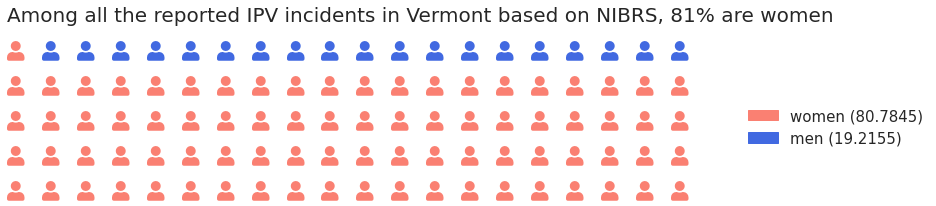

In [ ]:
#@title Demographic - gender
# data
import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['women', 'men'],
        'percent': [80.7845,19.2155]
    },
).set_index('labels')

# plot
colors_list = ['salmon', 'royalblue']
colors1 = {data.index[i]:colors_list[i] for i in range(len(data))}

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['percent'],
            'colors':list(colors1.values()),
            'labels': [f"{k} ({v})" for k, v in data['percent'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 0.6),
                'fontsize': 15,
                'frameon': False
            },
            'title': {
                'label': 'Among all the reported IPV incidents in Vermont based on NIBRS, 81% are women',
                'loc': 'left',
                'fontsize': 20
            }
        }
    },
    rows=5,
    icons=['user','user'],
    icon_size=20,
    vertical = True,
    figsize=(23, 8)  # figsize is a parameter of plt.figure
)


In [ ]:
#@title
# plot
import altair as alt

bars1 = alt.Chart(v).mark_bar().encode(
    x='value',
    y='variable',
    color=alt.Color('sex')
)

# text1 = bars1.mark_text(
#     align='right',
#     # baseline='right',
#     # dx=3  # Nudges text to right so it doesn't appear on top of the bar
# ).encode(
#     text='value'
# )

# upper = (bars1 + text1).properties(
upper = bars1.properties(
    title={
      "text": ["Victim Demographic - Gender"], 
      # "subtitle": [
      #              "From the pooled estimates for 13 countries, nearly 7 in 10 women (68%) think",
      #              "the incidence of physical or verbal abuse by a spouse/partner violence has increased",
      #              "during the pandemic in the area where they live."],
      "color": "black",
      "subtitleColor": "black",
      'align': 'left'
    },
    width=800,
    height=100
).configure_title(fontSize=18)

upper

alt.Chart(...)

In [ ]:
#@title
df_ipv.groupby(["RELATIONSHIP_NAME"]).size().reset_index(name='counts').sort_values("counts")

,RELATIONSHIP_NAME,counts
0,Homosexual Relationship,18
2,Victim Was Common-Law Spouse,101
3,Victim Was Ex-Relationship (Ex-Boyfriend/Girlf...,159
5,Victim was Ex-Spouse,291
4,Victim Was Spouse,977
1,Victim Was Boyfriend/Girlfriend,2992


In [ ]:
#@title
df_child.groupby(["RELATIONSHIP_NAME"]).size().reset_index(name='counts').sort_values("counts")

,RELATIONSHIP_NAME,counts
2,Victim Was Grandchild,35
3,Victim Was Stepchild,111
1,Victim Was Child of Boyfriend or Girlfriend,193
0,Victim Was Child,661


In [ ]:
#@title
fp3=fp_data+"/VT 2019/REF_RACE.CSV"
race = read_csv(fp3)

In [ ]:
#@title
df_ipv.groupby(["VICTIM_RACE_ID"]).size().reset_index(name='counts').sort_values("counts").merge(race[["RACE_ID","RACE_DESC"]],
                                                                                                  left_on="VICTIM_RACE_ID",
                                                                                                  right_on="RACE_ID")


,VICTIM_RACE_ID,counts,RACE_ID,RACE_DESC
0,3.0,7,3,American Indian or Alaska Native
1,0.0,30,0,Unknown
2,4.0,67,4,Asian
3,2.0,173,2,Black or African American
4,1.0,4261,1,White


In [ ]:
#@title
df_child.groupby(["VICTIM_RACE_ID"]).size().reset_index(name='counts').sort_values("counts").merge(race[["RACE_ID","RACE_DESC"]],
                                                                                                  left_on="VICTIM_RACE_ID",
                                                                                                  right_on="RACE_ID")

,VICTIM_RACE_ID,counts,RACE_ID,RACE_DESC
0,4.0,10,4,Asian
1,0.0,22,0,Unknown
2,2.0,54,2,Black or African American
3,1.0,914,1,White


###2. Is there relationship between number of reports and socioeconomic factors?

NIBRS data: Calendar years 2017-2020 were used for the analysis.

Deal with the socioeconomic data

In [ ]:
#@title
## NIBRS data
# check how many nan
from collections import Counter
a = df_ipv['COUNTY_NAME'].values.tolist()
Counter(a)

# sum 2017-2020 by county
# ipv
import pandas as pd
ipv_county=df_ipv.groupby(['COUNTY_NAME']).size().reset_index(name='ipv_counts')
# ipv_county 

#DV against children
child_county=df_child.groupby(['COUNTY_NAME']).size().reset_index(name='child_counts')
child_county.loc[len(child_county.index)] = ['ESSEX', 0] 
# child_county # sum 2017-2020 by county

In [ ]:
#@title
## socioeconomic data
# set the filepath and load
fp_data = "/content/drive/MyDrive/2022 spring 5293 comp journalism/VTDigger Story/VTDigger-DV-story-data&codes/data" # change your path

socio0 = read_csv(fp_data +"/socioeconomic data.csv",header=0).set_index("All Topics Population Age and Sex Race and Hispanic Origin Population Characteristics Housing Families & Living Arrangements Computer and Internet Use Education Health Economy Transportation Income & Poverty Businesses Geography")
socio = socio0.T
socio=socio[['Population, Census, April 1, 2020', 'High school graduate or higher, percent of persons age 25 years+, 2016-2020',
      "Bachelor's degree or higher, percent of persons age 25 years+, 2016-2020",
      "Per capita income in past 12 months (in 2020 dollars), 2016-2020",
      "Total nonemployer establishments, 2018" #this is the total number, not a percent
]]
socio = socio.drop("Vermont")

socio["COUNTY_NAME"]= list(ipv_county["COUNTY_NAME"]) # add a column shows county name, we can do this because their county names are in the same order.

In [ ]:
#@title
## merge the data frame
df = ipv_county.merge(child_county, on = ["COUNTY_NAME"])
df = df.merge(socio, on = ["COUNTY_NAME"])
df.sort_values("ipv_counts",inplace=True)

# convert string to numeric
import pandas as pd
df = df.iloc[:,:-1] # delete the last column
df.iloc[:,3]=df.iloc[:,3].replace({",":""},regex=True).apply(pd.to_numeric,1)
df.iloc[:,4]=df.iloc[:,4].replace({"%":""},regex=True).apply(pd.to_numeric,1)/100
df.iloc[:,5]=df.iloc[:,5].replace({"%":""},regex=True).apply(pd.to_numeric,1)/100
df.iloc[:,6]=df.iloc[:,6].replace({'\$':'',",":""},regex=True).apply(pd.to_numeric,1)
df.iloc[:,-1]=df.iloc[:,-1].replace({",":""},regex=True).apply(pd.to_numeric,1)

# change column name
df.columns = ["county","ipv_counts","child_counts","population",">=High school graduate%",">=Bachelor%","income"] 

In [ ]:
#@title
df

,county,ipv_counts,child_counts,population,>=High school graduate%,>=Bachelor%,income
4,ESSEX,2,0,5920,0.884,0.184,27583
6,GRAND ISLE,18,7,7293,0.939,0.422,41530
8,ORANGE,25,20,29277,0.927,0.319,33384
0,ADDISON,110,43,37363,0.942,0.410,36390
9,ORLEANS,125,50,27393,0.895,0.242,29116
7,LAMOILLE,132,36,25945,0.925,0.410,38794
2,CALEDONIA,340,47,30233,0.928,0.307,30902
10,RUTLAND,386,98,60572,0.937,0.322,31831
13,WINDSOR,410,102,57753,0.947,0.384,37145
1,BENNINGTON,415,129,37347,0.926,0.375,34435


Variables:

county:COUNTY_NAME       

ipv_counts:counts of IPV in calendar years 2017-2020

child_counts:counts of DV against children in calendar years 2017-2020

population: Population, Census, April 1, 2020                                               

\>=High school graduate%: High school graduate or higher, percent of persons age 25 years+, 2016-2020    

\>=Bachelor%: Bachelor's degree or higher, percent of persons age 25 years+, 2016-2020       

income: Per capita income in past 12 months (in 2020 dollars), 2016-2020                
                                        



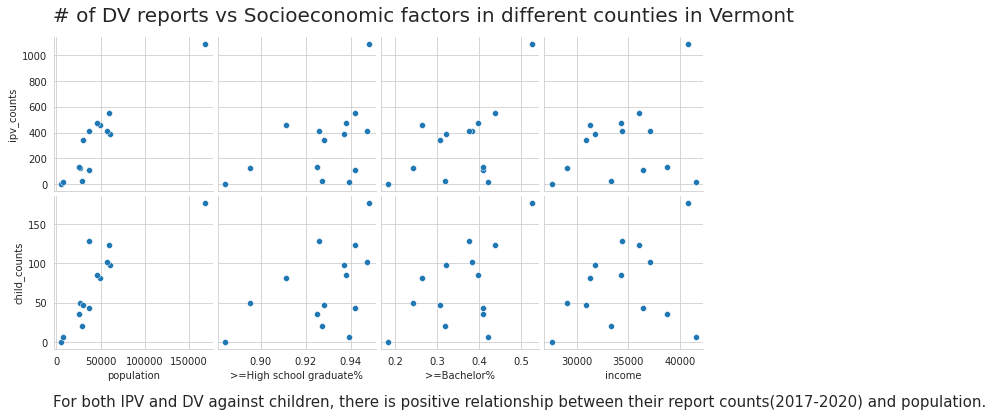

In [ ]:
#@title
#
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
# Histogram
g= sns.pairplot(data=df, diag_kind="hist", 
                x_vars=["population",">=High school graduate%",">=Bachelor%","income"],
                y_vars=["ipv_counts","child_counts"],
                height=2.5)#.tight_layout()
g.fig.text(0.08, 1.02,'# of DV reports vs Socioeconomic factors in different counties in Vermont', fontsize=20)
g.fig.text(0.08, -0.05,'For both IPV and DV against children, there is positive relationship between their report counts(2017-2020) and population.', fontsize=15)
    
 
# # custom it as a density plot or histogram so see the related sections
# sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )

plt.show()

Why is this not consistent with our interviews with advocates in shelters?

Maybe because the socioeconomics data is for the whole county population, not for the victim group.

### 3. map IPV by county

In [ ]:
#@title
!pip install pyshp
!pip install geopandas

In [ ]:
#@title
import numpy as np
import pandas as pd
import shapefile as shp
from datetime import datetime, timedelta
import geopandas as gpd
import json
import plotly.express as px

Convert Shapefile to GeoJSON:

In [ ]:
#@title
# set the filepath and load
fp1 = fp_data + "/cb_2018_us_county_20m/cb_2018_us_county_20m.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp1)
map_df.columns=['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'county', 'LSAD',
       'ALAND', 'AWATER', 'geometry']
map_df_vt = map_df[map_df['STATEFP']=='50']

fp2 = fp_data + "/cb_2018_us_county_20m.json"
map_df_vt.to_file(fp2, driver='GeoJSON')

Load and compress GeoJSON

In [ ]:
#@title
with open(fp_data +"/cb_2018_us_county_20m.json") as f:
  up_districts = json.load(f)

In [ ]:
#@title
import string
ipv_county_map = ipv_county
ipv_county_map["COUNTY_NAME"]=[s.capitalize() for s in ipv_county["COUNTY_NAME"]]
ipv_county_map["percent"]=ipv_county["ipv_counts"]/sum(ipv_county["ipv_counts"])*100
ipv_county_map

,COUNTY_NAME,ipv_counts,percent
0,Addison,110,2.428256
1,Bennington,415,9.161148
2,Caledonia,340,7.505519
3,Chittenden,1084,23.929360
4,Essex,2,0.044150
5,Franklin,459,10.132450
6,Grand isle,18,0.397351
7,Lamoille,132,2.913907
8,Orange,25,0.551876
9,Orleans,125,2.759382


In [ ]:
#@title
max_count = ipv_county_map['percent'].max()
fig = px.choropleth_mapbox(ipv_county_map, geojson=up_districts,
                           locations='COUNTY_NAME', 
                           featureidkey="properties.county",
                           color='percent',
                           color_continuous_scale=px.colors.sequential.Cividis_r,#"dense",#"Viridis",
                           width=900, height=500,
                           range_color=(0, max_count),
                           mapbox_style="carto-positron",
                           opacity=0.5,
                           center = {"lat": 44, "lon":-72.532638 }, 
                           zoom=6.5,
#                            animation_frame='dt_str',
                           labels={"COUNTY_NAME":"County name",
                                   'percent':'IPV percent'}
                          )
fig.update_geos(fitbounds="locations",visible=False)


fig.update_layout(
    title='IPV in Vermont',
    margin={"r":0,"t":40,"l":0,"b":0},
    font=dict(size=15),
)
fig.show()

# Additional stuff:
A visualization of one report we read

THE SHADOW PANDEMIC: Most women think domestic violence has increased during the pandemic

Sources:

[COVID-19 and violence against women: What the data tells us](https://www.unwomen.org/en/news-stories/feature-story/2021/11/covid-19-and-violence-against-women-what-the-data-tells-us)

[MEASURING THE SHADOW PANDEMIC: Voilence against women during COVID-19](https://data.unwomen.org/sites/default/files/documents/Publications/Measuring-shadow-pandemic.pdf)

**Abstract**

About the report:

*\"This publication compiles and analyses the results of Rapid Gender Assessment surveys on the impact of COVID-19 on violence
against women (VAW RGAs) in 13 countries. UN Women led this study, in collaboration with Ipsos, with support from national
statistical offices, national women’s machineries and a technical advisory group of experts to guide the overall survey process.\"*


Respondents:

*\"Data
were collected from 16,154 women (at least 1,200 per
country) ages 18 years and over, while considering
nationally-representative geographic and age group
distribution. Since the VAW RGAs were implemented
using computer-assisted telephone interviewing
(CATI), the respondents were limited to women
with access to mobile phones.\"*

Conclusions:

*\"Perceptions tell us what people believe about a given trend or problem, whether or not these
perceptions are based on reality. They often reflect individuals’ fears and ultimately influence
people’s feelings of safety. Perceptions matter because they affect how people behave, in this case
sometimes limiting women’s well-being at home, freedom, movement or willingness to engage in
public life. This is particularly crucial during crises such as COVID-19, when survivors of violence
may feel reluctant to seek the support of families and friends, or support services provided by law
enforcement, government or civil society.\"*

*\"Most women think domestic
violence has increased during the
pandemic*

*From the pooled estimates for 13 countries, nearly 7 in
10 women (68%) think the incidence of physical or verbal
abuse by a spouse/partner violence has increased during
the pandemic in the area where they live.\"*

*\"Most women think that women
experiencing domestic violence are
more likely to seek help from family
members*

*\"When asked whether women survivors of violence would
seek help in such scenarios, most respondents (8 in 10)
said they think these women would reach out for help,
with the family being the top option (49%). Only 11% of
respondents said they think women would reach out to
police; and 10% said women would go to women’s support
centres or groups. \"*


In [ ]:
#@title
# data
import pandas as pd

source1 = pd.DataFrame(
    {
        'think increase?': ['yes','not'],
        'percent%': [68,32],
    }
)

source2 = pd.DataFrame(
    {
        'reach out': ['To family','To police', 'To women’s support centres/groups'],
        'percent%': [49,11,10],
    }
)

# plot
import altair as alt

# upper plot
bars1 = alt.Chart(source1).mark_bar().encode(
    x='percent%:Q',
    y=alt.Y('think increase?:N', sort='-x'),
    color=alt.Color('think increase?:N')
)

text1 = bars1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='percent%:Q'
)

upper = (bars1 + text1).properties(
    title={
      "text": ["According to a study led by UN women, most women",
               "think domestic violence has increased during the pandemic\n"], 
      "subtitle": [
                   "From the pooled estimates for 13 countries, nearly 7 in 10 women (68%) think",
                   "the incidence of physical or verbal abuse by a spouse/partner violence has increased",
                   "during the pandemic in the area where they live."],
      "color": "black",
      "subtitleColor": "black",
      'align': 'right'
    },
    width=400,
    height=50
)

# lower plot
bars2 = alt.Chart(source2).mark_bar().encode(
    x='percent%:Q',
    y=alt.Y('reach out:N', sort='-x')
)

text2 = bars2.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='percent%:Q'
)

lower = (bars2 + text2).properties(
    title={
      "text": ["Only 11% of respondents said", "they think women would reach out to police"], 
      "subtitle": ["When asked whether women survivors of violence would seek help in such scenarios,", 
                   "most respondents (8 in 10) said they think these women would reach out for help,", 
                   "with the family being the top option (49%). ",
                   "Only 11% of respondents said they think women would reach out to police;",
                   "and 10% said women would go to women’s support centres or groups."],
      "color": "black",
      "subtitleColor": "black",
      'align': 'right'
    },
    width=400,
    height=100
)


# concatenate
alt.vconcat(upper, lower).configure_title(
    fontSize=20,
    dy = -15,
    anchor = "end",
    # font=font,
    baseline = 'bottom'
)



alt.VConcatChart(...)

In [ ]:
#@title
